In [1]:
##  Prediction using Supervised ML 

##  ● Predict the percentage of marks of an student based on the number of study hours 
##  ● This is a simple linear regression task as it involves just 2 variables.
##  ● What will be predicted score if a student studies for 9.25 hrs/ day? 

## Importing the required datasets

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Importing the dataset

student_scores = pd.read_csv('C:\\Users\\Niks PC\\Desktop\\Spark Foundation\\student_scores.csv')
student_scores.shape

## Getting dataset information
student_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Text(0.5, 0, 'Hours')

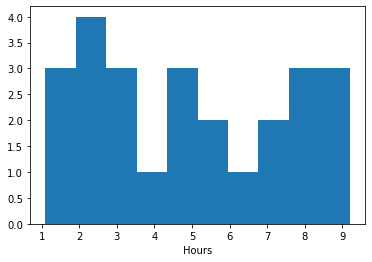

In [3]:
## Checking for the distribution of data
## Plotting the histograms

## Hours column
plt.hist(student_scores.Hours)
plt.xlabel('Hours')

Text(0.5, 0, 'Scores')

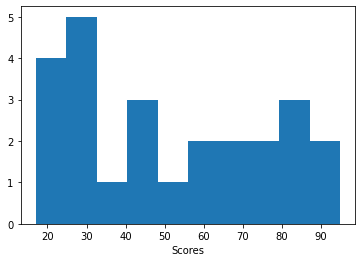

In [4]:
## Scores column
plt.hist(student_scores.Scores)
plt.xlabel('Scores')

In [5]:
## Checking for the null values
student_scores.isna().sum()        ## NO null values

Hours     0
Scores    0
dtype: int64

C:\Users\Niks PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours'>

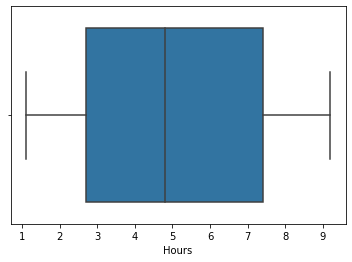

In [6]:
## checking for the outliers by plotting the boxplot

## Hours Column
sns.boxplot(student_scores['Hours'])  ## NO outliers are present

C:\Users\Niks PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Scores'>

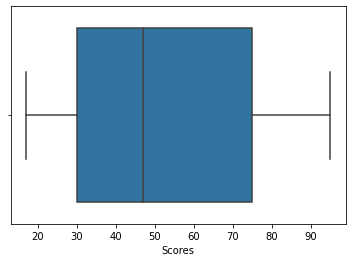

In [7]:
## Scores column
sns.boxplot(student_scores['Scores']) ## NO outliers are present

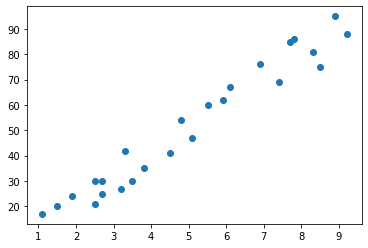

In [8]:
## Checking for the linearity between the input and output variables
## plotting the scatter plot

plt.scatter(student_scores['Hours'],student_scores['Scores'])
## From the graph there we can conclude that there is strong linear relation between the 
## input and output variable

In [9]:
## Confirming it with the correlation coefficient
student_scores.corr()   ## corrleation coefficient between Scores and Hours in 0.97

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
##Checking for normality of the dataset
student_scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
## Splitting the data into test and train
from sklearn.model_selection import train_test_split

student_train,student_test = train_test_split(student_scores, test_size = 0.2,random_state = 11)

In [12]:
## Building the model
import statsmodels.formula.api as smf

# Simple Linear Regression
model = smf.ols('Scores ~ Hours', data = student_train).fit()
model.summary()  ## R-squared = 0.959  and Adj.R squared = 0.957

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     420.2
Date:                Mon, 19 Jul 2021   Prob (F-statistic):           6.29e-14
Time:                        19:36:32   Log-Likelihood:                -59.133
No. Observations:                  20   AIC:                             122.3
Df Residuals:                      18   BIC:                             124.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4793      2.591     -0.185      0.855      -5.924       4.965
Hours         10.5316      0.514     20.500      0.000       9.452      11.611
==============================================================================
Omnibus:                        8.856   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                2.057
Skew:                          -0.201   Prob(JB):                        0.358
Kurtosis:                       1.481   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
from sklearn.metrics import r2_score

In [14]:
## Predicting on the test data
pred_test = model.predict(student_test)

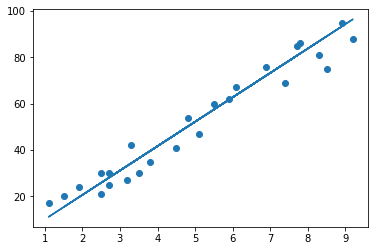

In [15]:
plt.scatter(student_scores['Hours'],student_scores['Scores'])
plt.plot(student_scores['Hours'],model.predict(student_scores['Hours']))

In [16]:
##  Calculating test residuals = fitted value - actual value
test_res = pred_test - student_test['Scores']

In [17]:
## RMSE test
rmse_test = np.sqrt(np.mean(test_res*test_res))

rmse_test    ## 8.869

8.869098550020903

In [18]:
## Predicting on the train data
pred_train = model.predict(student_train)

In [19]:
## Calculating train residuals 
train_res = pred_train - student_train['Scores']

In [20]:
## RMSE train
rmse_train = np.sqrt(np.mean(train_res*train_res))

rmse_train  ## 4.653

4.653947774939532

In [21]:
### Importing the new data on which predictions to be made

new_score = pd.read_csv('C:\\Users\\Niks PC\\Desktop\\Book1.csv')
print(new_score)




   Hours
0   9.25
1   3.00
2   2.00
3  15.00
4  10.00
5  20.00
6  21.00
7  16.00
8   8.00


In [22]:
## Predicting on the new data
pred_new = model.predict(new_score)

pred_new

### So th approximate score for 9.25 hours of study would be 96.93


0     96.937767
1     31.115428
2     20.583854
3    157.494319
4    104.836448
5    210.152190
6    220.683764
7    168.025893
8     83.773300
dtype: float64